1. Preprocessing

In [1]:
# Importing the libraries we'll need in preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Using the pandas library to read the csv file
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Checking to see if there's a duplicated ID
df['id'].duplicated().sum()

0

In [5]:
# Checking to see if there's any value other than Male or Female in the gender column
df['gender'].isin(['Male','Female']).any()

True

In [6]:
# Checking to see if there's any value other than 0 or 1 in the Hyptertension column
df['hypertension'].isin([0,1]).any()

True

In [7]:
# Checking to see if there's any value other than 0 or 1 in the Heart Disease column
df['heart_disease'].isin([0,1]).any()

True

In [8]:
# Checking to see if there's any value other than Yes or No in the Ever Married column
df['ever_married'].isin(['Yes','No']).any()

True

In [9]:
# Replacing the Yes values with 1 and the No values with 0
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})

C:\Users\tarek\AppData\Local\Temp\ipykernel_19648\2403075098.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})


In [10]:
# Making sure the work type column doesn't have any outliers
print(df['work_type'].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [11]:
# Captilizing and renaming values to a more preferable form
df['work_type'] = df['work_type'].replace({'children': 'Children', 'Govt_job': 'Government Job','Self-employed':'Self-Employed','Never_worked':'Never Worked'})

In [12]:
# Making sure the work type column doesn't have any outliers
print(df['Residence_type'].unique())

['Urban' 'Rural']


In [13]:
# Checking to see if the average glucose level column has any null values
print(df['avg_glucose_level'].isnull().sum())

0


In [14]:
# Checking to see if the average glucose level column has any negative values
print((df['avg_glucose_level'] < 0).values.any())

False


In [15]:
# Checking to see if the BMI column has any null values
print(df['bmi'].isnull().sum())

201


In [16]:
# Removing the null values from the BMI column
df=df.dropna()

In [17]:
# Checking to see if the BMI column has any negative values
print((df['bmi'] < 0).values.any())

False


In [18]:
# Making sure the work type column doesn't have any outliers
print(df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [19]:
# Captilizing and renaming values to a more preferable form
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked': 'Formerly Smoked', 'never smoked': 'Never Smoked','smokes':'Currently Smokes'})

C:\Users\tarek\AppData\Local\Temp\ipykernel_19648\3167161037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].replace({'formerly smoked': 'Formerly Smoked', 'never smoked': 'Never Smoked','smokes':'Currently Smokes'})


In [20]:
df['smoking_status'].isin(['Unknown']).sum()

1483

In [21]:
# Renaming the columns to a more preferable form
df=df.rename(columns={'id':'ID','gender':'Gender','age':'Age','hypertension':'Hypertension','heart_disease':'Heart Disease','ever_married':'Ever Married','work_type':'Work Type','Residence_type':'Residence Type','avg_glucose_level':'Average Glucose Level','bmi':'BMI','smoking_status':'Smoking Status','stroke':'Stroke'})

In [22]:
df

,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,Formerly Smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,Never Smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,Currently Smokes,1
4,1665,Female,79.0,1,0,1,Self-Employed,Rural,174.12,24.0,Never Smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,Formerly Smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,0,Children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,1,Self-Employed,Urban,125.20,40.0,Never Smoked,0
5107,19723,Female,35.0,0,0,1,Self-Employed,Rural,82.99,30.6,Never Smoked,0
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.6,Formerly Smoked,0


In [23]:
# Saving the cleaned dataframe as a csv file
df.to_csv('CleanedData.csv')

2. Clustering Algorithms

KMedoids Clustering

In [24]:
# Importing the library we'll use in KMedoids
from sklearn_extra.cluster import KMedoids

In [25]:
# Choosing the columns we'll use for clustering
clustering_data=df[['Age','Average Glucose Level','BMI']]
clustering_data=np.array(clustering_data)
clustering_data

array([[ 67.  , 228.69,  36.6 ],
       [ 80.  , 105.92,  32.5 ],
       [ 49.  , 171.23,  34.4 ],
       ...,
       [ 35.  ,  82.99,  30.6 ],
       [ 51.  , 166.29,  25.6 ],
       [ 44.  ,  85.28,  26.2 ]])

Using 2 Different Methods to determine the ideal number of clusters

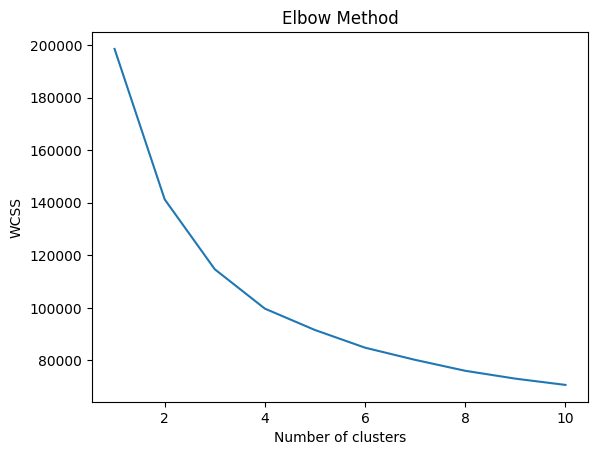

In [26]:
# Elbow Method

# Calculate within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=0)
    kmedoids.fit(clustering_data)
    wcss.append(kmedoids.inertia_)

# Plotting the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

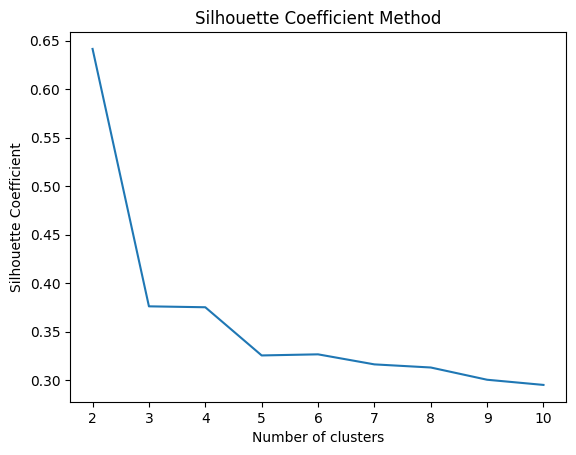

In [27]:
# Silhouette Method

# Import the library we'll use
from sklearn.metrics import silhouette_score

# Calculate Silhouette Coefficient for different values of k
silhouette_scores = []
for i in range(2, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=0)
    cluster_labels = kmedoids.fit_predict(clustering_data)
    silhouette_avg = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Coefficient method graph
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

From the 2 methods we've determined that the optimal of clusters is 2

In [ ]:
# Choosing the number of clusters as 2
k=2

# Using the kmedoids algorithm on our data
kmedoids=KMedoids(n_clusters=k).fit(clustering_data)
clusters=kmedoids.cluster_centers_
labels=kmedoids.labels_

# Add cluster labels to DataFrame
df['Cluster'] = labels

print('Lables :',labels, "\n")
print('Clusters :',clusters, "\n")

for j in range(k):
    for i in range(len(clustering_data)):
        if (kmedoids.labels_[i]==j):
            x=clustering_data[i]
            print("Cluster", j ,':', x)

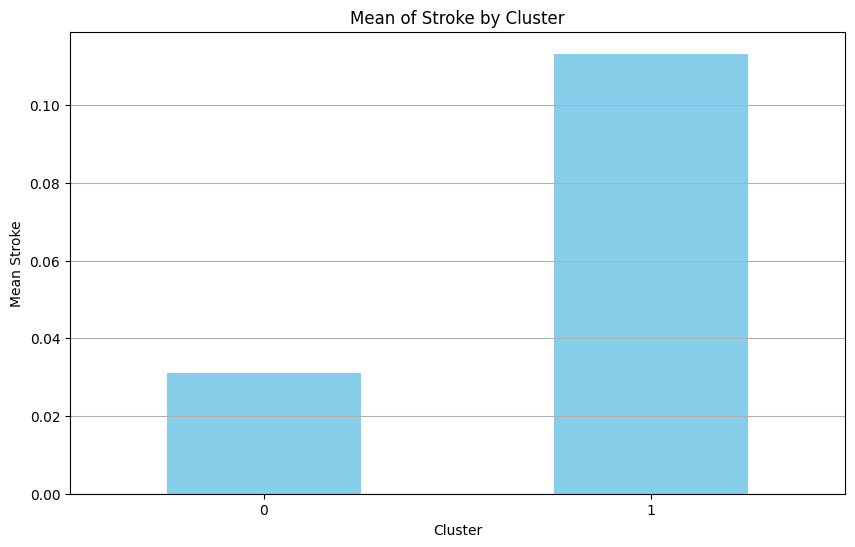

In [29]:
# Plotting the Percentage of Clusters
# Group by cluster and calculate the mean of the column_to_compare
cluster_means = df.groupby('Cluster')['Stroke'].mean()

# Plot the cluster means
plt.figure(figsize=(10, 6))
cluster_means.plot(kind='bar', color='skyblue')
plt.title('Mean of {} by Cluster'.format('Stroke'))
plt.xlabel('Cluster')
plt.ylabel('Mean {}'.format('Stroke'))
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

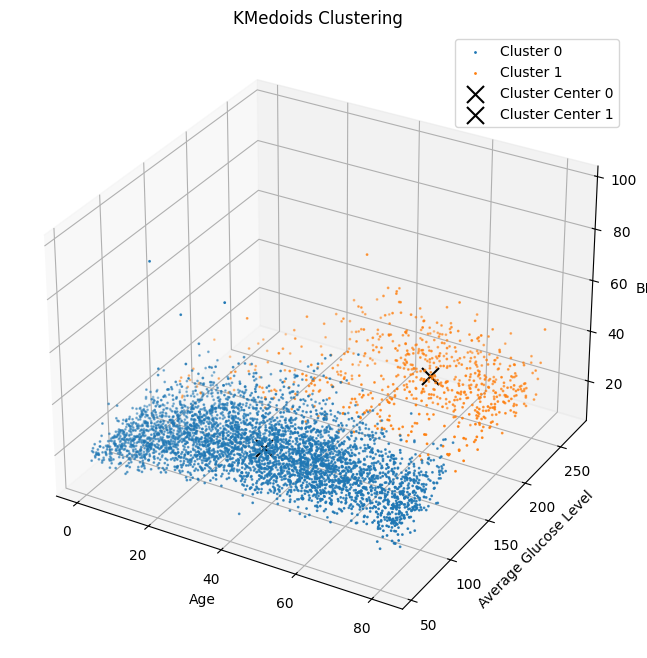

In [30]:
# Plotting the clusters in a 3d scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point with its cluster color
for i in range(k):
    cluster_points = clustering_data[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
                label='Cluster {}'.format(i),s=1)

# Plot cluster centers after plotting the points
for i in range(2):
    ax.scatter(clusters[i, 0], clusters[i, 1], clusters[i, 2], c='black',
                marker='x', s=150, label='Cluster Center {}'.format(i))

ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')
ax.set_title('KMedoids Clustering')
ax.legend()
plt.show()

In [31]:
equal_count = (df['Stroke'] == df['Cluster']).sum()
total_count = len(df)
percentage_equal = (equal_count / total_count) * 100

print(f"The accuracy of the KMedoids clustering is: {percentage_equal}%")

The accuracy of the KMedoids clustering is: 84.88490527602363%


Hierarchical Clustering

In [32]:
# Importing the library we'll use
from scipy.cluster.hierarchy import dendrogram ,linkage , fcluster

In [33]:
x1= clustering_data
z1= linkage(x1, method='single', metric='euclidean')
z2= linkage(x1, method='complete', metric='euclidean')
z3= linkage(x1, method='average', metric='euclidean')
z4= linkage(x1, method='ward', metric='euclidean')

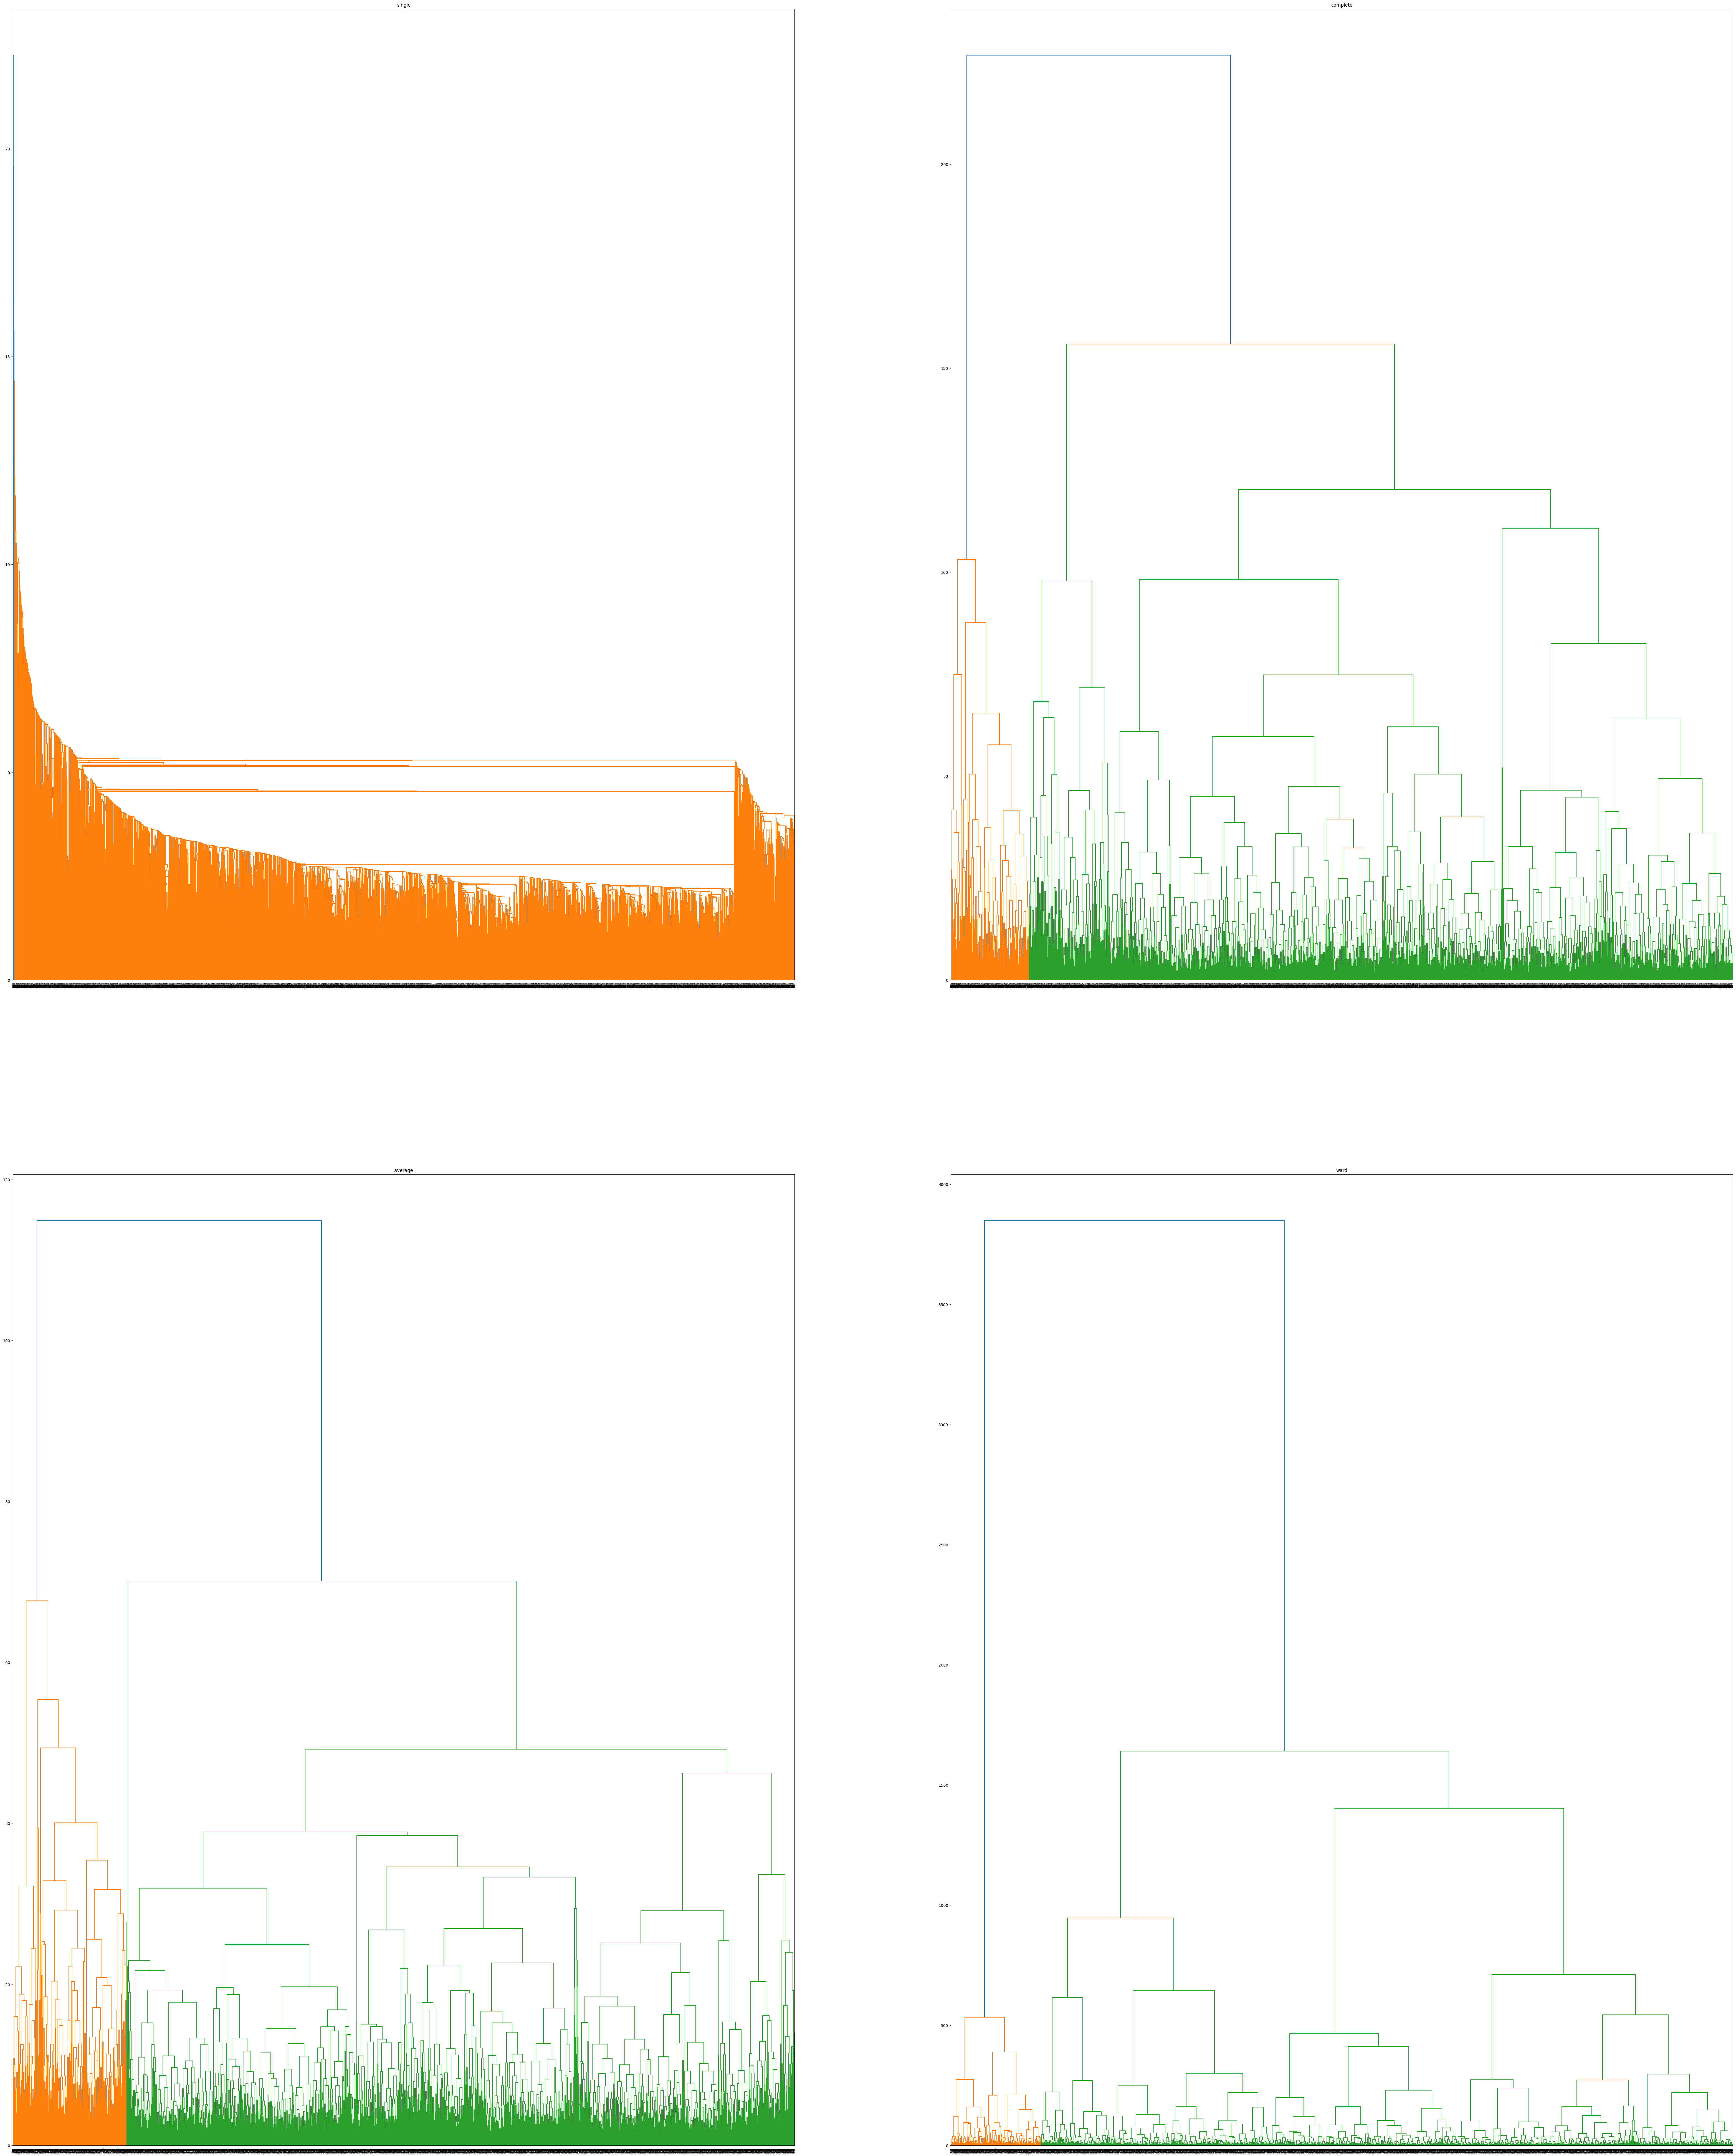

In [34]:
plt.figure(figsize=(80,100))
plt.subplot(2,2,1), dendrogram(z1) , plt.title('single')
plt.subplot(2,2,2), dendrogram(z2) , plt.title('complete')
plt.subplot(2,2,3), dendrogram(z3) , plt.title('average')
plt.subplot(2,2,4), dendrogram(z4) , plt.title('ward')
plt.show()

In [35]:
f1=fcluster(z4,3)
d=pd.DataFrame(f1)
print((d!=1).values.any())

False


Fuzzy Clustering

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Generate universe variables
bmi = ctrl.Antecedent(np.arange(0, 101, 1), 'bmi')
glucose_level = ctrl.Antecedent(np.arange(0, 301, 1), 'glucose_level')
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
stroke = ctrl.Consequent(np.arange(0, 101, 1), 'stroke')

In [ ]:
# Define membership functions for BMI
age['young'] = fuzz.trimf(age.universe, [0, 20,30])
age['middle_aged'] = fuzz.trimf(age.universe, [25, 40, 60])
age['elderly'] = fuzz.trimf(age.universe, [55, 80, 100])

bmi['under_weight'] = fuzz.trimf(bmi.universe, [10.3, 15.88, 20])
bmi['normal_weight'] = fuzz.trimf(bmi.universe, [18.5, 22, 25])
bmi['over_weight'] = fuzz.trimf(bmi.universe, [23.2, 27, 35])
bmi['obese'] = fuzz.trimf(bmi.universe, [30, 60.2, 97.7])

glucose_level['low'] = fuzz.trimf(glucose_level.universe, [30, 45, 60])
glucose_level['normal'] = fuzz.trimf(glucose_level.universe, [50.3, 70, 100])
glucose_level['high'] = fuzz.trimf(glucose_level.universe, [95, 125,275 ])

# Define membership functions for Stroke
stroke['absent'] = fuzz.trimf(stroke.universe, [0, 25, 50])
stroke['present'] = fuzz.trimf(stroke.universe, [45, 75, 100])

Visualizing the membership function

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


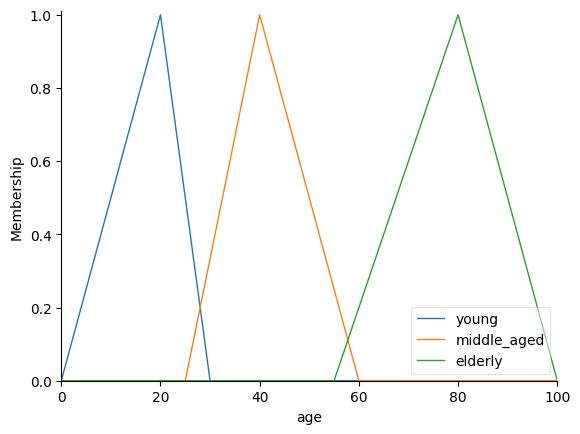

In [ ]:
age.view()

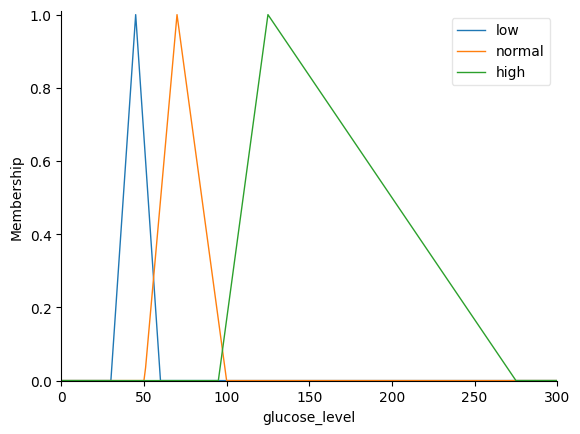

In [ ]:
glucose_level.view()

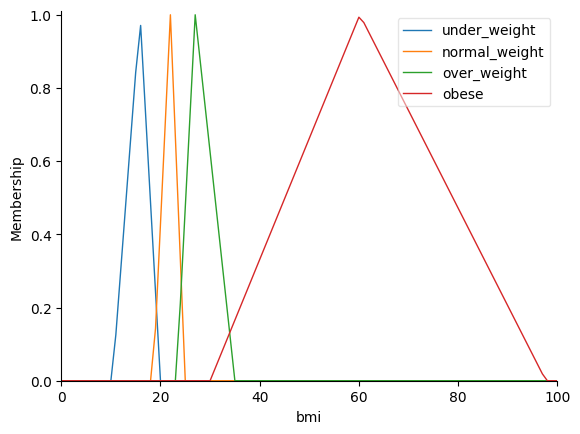

In [ ]:
bmi.view()

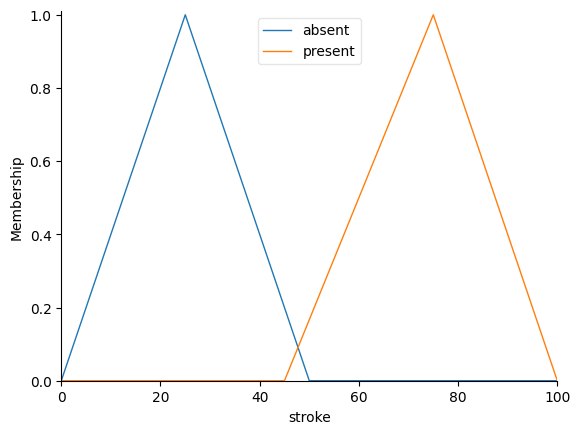

In [ ]:
stroke.view()

In [ ]:
# Define fuzzy rules
rule1 = ctrl.Rule(bmi['normal_weight'] & glucose_level['normal'] & age['young'], stroke['absent'])
rule2 = ctrl.Rule(bmi['over_weight'] & glucose_level['normal'] & age['middle_aged'], stroke['absent'])
rule3 = ctrl.Rule(bmi['under_weight'] & glucose_level['low'] & age['elderly'], stroke['present'])
rule4 = ctrl.Rule(bmi['obese'] & glucose_level['high'] & age['elderly'], stroke['present'])

In [ ]:
# Create a control system
stroke_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

# Create a control system simulation
stroke_prediction = ctrl.ControlSystemSimulation(stroke_ctrl)

In [ ]:
# Example (1) Prediction
stroke_prediction.input['bmi'] = 70
stroke_prediction.input['glucose_level'] = 150
stroke_prediction.input['age'] =90
stroke_prediction.compute()

# Print the predicted stroke likelihood
print("Predicted stroke likelihood:", stroke_prediction.output['stroke'])

Predicted stroke likelihood: 73.05555555555554


In [ ]:
# Example (2) prediction
stroke_prediction2 = ctrl.ControlSystemSimulation(stroke_ctrl)
stroke_prediction2.input['bmi'] = 22
stroke_prediction2.input['glucose_level'] = 70
stroke_prediction2.input['age'] =20
stroke_prediction2.compute()

# Print the predicted stroke likelihood
print("Predicted stroke likelihood:", stroke_prediction2.output['stroke'])

Predicted stroke likelihood: 24.999999999999996


Visualizing the membership for example (1)

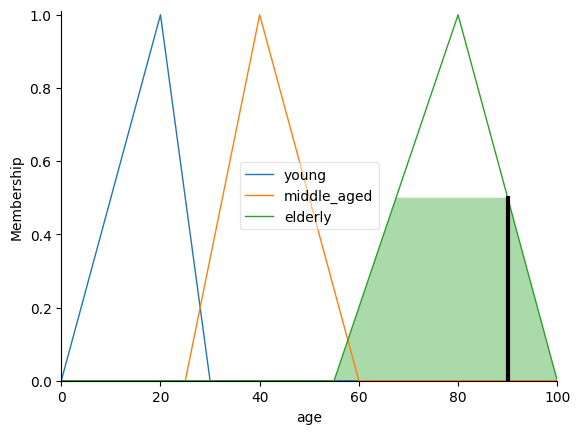

In [ ]:
age.view(stroke_prediction)

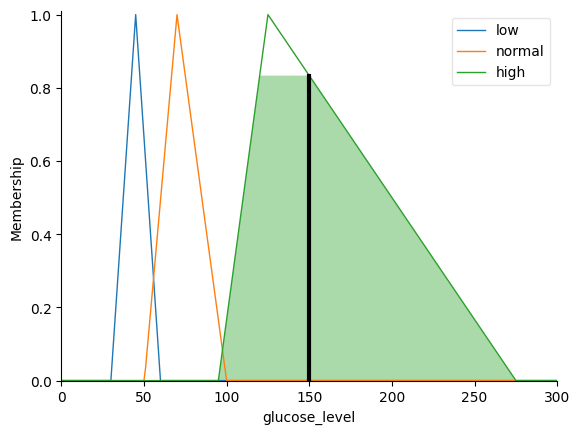

In [ ]:
glucose_level.view(stroke_prediction)

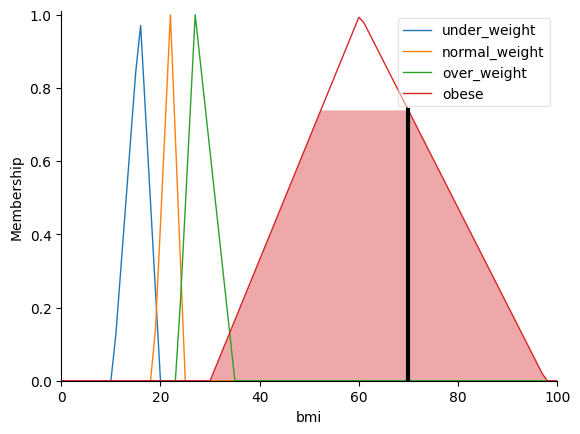

In [ ]:
bmi.view(stroke_prediction)